## ACTD 2024 - 20

### Clases 13-14: redes neuronales para clasificación

- Redes densas
- Redes para clasificación
- Procesamiento de datos continuos y categóricos
- Funciones de activación y pérdida

Construyamos un modelo para clasificar flores con el dataet iris usando Keras y Tensorflow

In [1]:
import tensorflow as tf

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importemos y exploremos los datos

In [2]:
iris = load_iris()

print(iris.data[0:3,])
print(iris.target[0:3,])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0]


Codifiquemos la variable de salida como categórica con 3 clases

In [4]:
y = tf.keras.utils.to_categorical(iris.target, num_classes=3)

print(y[0:3,])
print(y.shape)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
(150, 3)


Dividamos los datos en entrenamiendo, validación y prueba usando Scikit-Learn

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

X_train.shape

(96, 4)

Reescalemos los datos (inputs X) usando una normalización estándar

In [6]:
std_scl = StandardScaler()
std_scl.fit(X_train)

print(X_train[0:3,])
X_train = std_scl.transform(X_train)
print(X_train[0:3,])
X_valid = std_scl.transform(X_valid)
X_test = std_scl.transform(X_test)

[[6.  3.  4.8 1.8]
 [6.7 3.1 4.7 1.5]
 [5.5 2.4 3.7 1. ]]
[[ 0.16110746 -0.23717928  0.58382847  0.77996804]
 [ 1.01358158 -0.01611898  0.52732894  0.3865691 ]
 [-0.44780262 -1.56354107 -0.03766635 -0.2690958 ]]


In [7]:
X_train.dtype

dtype('float64')

Construyamos el modelo con una capa de entrada, una capa densa con 5 neuronas y una capa de salida con 3 neuronas (1 por cada categoría de la variable de respuesta)

In [8]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(4,)))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(3, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Exploremos las capas del modelo, sus pesos y sesgos

In [10]:
model.layers

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense_1'

In [14]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.69930214, -0.7723183 , -0.49147654],
       [-0.39692473,  0.47480804, -0.04443109],
       [ 0.2372424 ,  0.25170606, -0.39467332],
       [ 0.13951439,  0.7643526 , -0.47557142],
       [-0.8139512 , -0.48083225,  0.30219847]], dtype=float32)

In [15]:
weights.shape

(5, 3)

In [16]:
import pandas as pd
pd.DataFrame(weights)

,0,1,2
0,0.699302,-0.772318,-0.491477
1,-0.396925,0.474808,-0.044431
2,0.237242,0.251706,-0.394673
3,0.139514,0.764353,-0.475571
4,-0.813951,-0.480832,0.302198


In [17]:
biases

array([0., 0., 0.], dtype=float32)

In [18]:
biases.shape

(3,)

In [19]:
pd.DataFrame(biases)

,0
0,0.0
1,0.0
2,0.0


Compilemos el modelo usando entropía categórica cruzada como función de pérdida

In [21]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

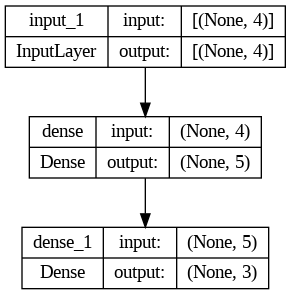

In [22]:
tf.keras.utils.plot_model(model, show_shapes=True)

Entrenemos el modelo

In [23]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/1000
3/3 [==============================] - 1s 151ms/step - loss: 1.9451 - accuracy: 0.0729 - val_loss: 1.6850 - val_accuracy: 0.1250
Epoch 2/1000
3/3 [==============================] - 0s 28ms/step - loss: 1.8719 - accuracy: 0.0833 - val_loss: 1.6278 - val_accuracy: 0.1667
Epoch 3/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.8043 - accuracy: 0.1146 - val_loss: 1.5754 - val_accuracy: 0.2083
Epoch 4/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.7420 - accuracy: 0.1458 - val_loss: 1.5281 - val_accuracy: 0.2083
Epoch 5/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.6849 - accuracy: 0.1667 - val_loss: 1.4850 - val_accuracy: 0.2500
Epoch 6/1000
3/3 [==============================] - 0s 26ms/step - loss: 1.6316 - accuracy: 0.1771 - val_loss: 1.4452 - val_accuracy: 0.2500
Epoch 7/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.5828 - accuracy: 0.1875 - val_loss: 1.4084 - val_accuracy: 0.2500
Epoch 8/1000

## Datos MNIST fashion
Ahora entrenemos otro modelo de clasificación, esta vez para datos MNIST fashion

In [24]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [25]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [26]:
X_train.shape

(55000, 28, 28)

In [27]:
pd.DataFrame(X_train[0,:])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,...,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,...,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,...,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,...,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,...,235,227,224,222,224,221,223,245,173,0


Reescalemos los datos para que cada pixel tenga un valor entre 0 y 1

In [28]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [29]:
pd.DataFrame(X_train[0,:])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003922,0.015686,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.211765,0.000000,0.000000,0.000000,0.003922,0.011765,0.015686,0.000000,0.000000,0.011765
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.564706,0.482353,0.090196,0.000000,0.000000,0.000000,0.000000,0.047059,0.039216,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.419608,0.611765,0.631373,0.427451,0.250980,0.090196,0.301961,0.509804,0.282353,0.058824
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.847059,0.639216,0.498039,0.474510,0.478431,0.572549,0.552941,0.345098,0.674510,0.258824
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,...,0.874510,0.874510,0.843137,0.835294,0.643137,0.498039,0.482353,0.768627,0.898039,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.921569,0.890196,0.878431,0.870588,0.878431,0.866667,0.874510,0.960784,0.678431,0.000000


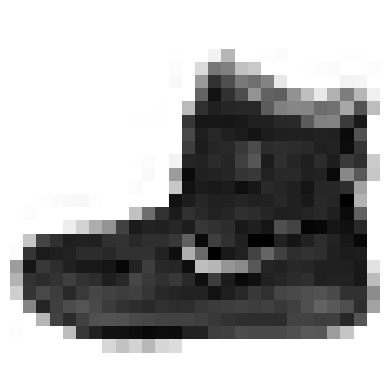

In [31]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [32]:
y_train[0]

9

Definamos los nombres de las 10 categorías

In [33]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

Grafiquemos algunos ejemplos de las imágenes en el dataset

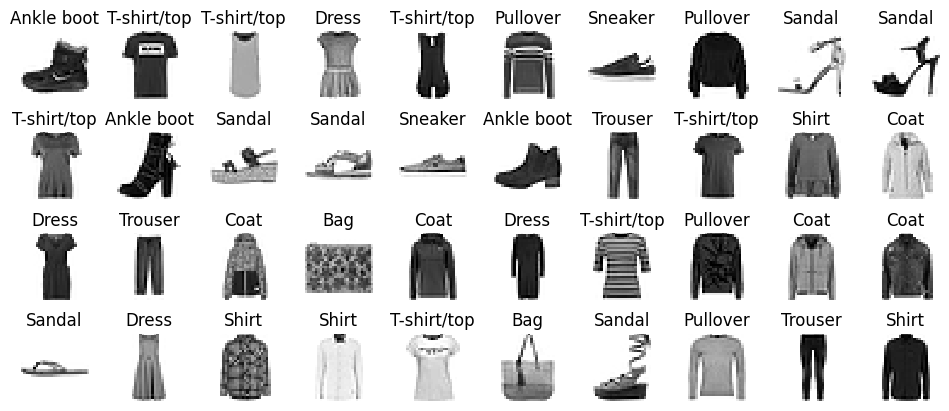

In [34]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Definimos el modelo con
- 1 capa de entrada
- 1 operación de adelgazamiento (flatten)
- 2 capas densas con función de activación ReLU
- 1 capa de salida con función de activación softmax (clasificación) con tantas neuronas como categorías tenemos etiquetadas (10)

In [35]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


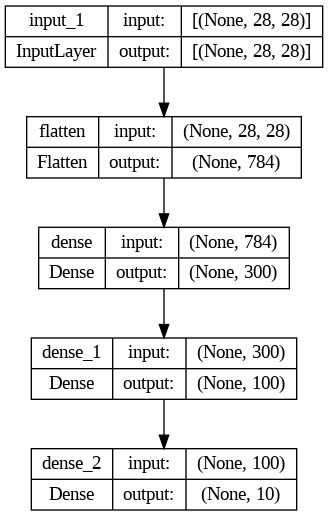

In [37]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [38]:
model.layers

In [39]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [40]:
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

In [41]:
biases.shape

(300,)

Compilamos el modelo

In [42]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Entrenamos el modelo

In [43]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7039 - accuracy: 0.7714 - val_loss: 0.5042 - val_accuracy: 0.8226
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4838 - accuracy: 0.8323 - val_loss: 0.4544 - val_accuracy: 0.8348
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4377 - accuracy: 0.8463 - val_loss: 0.4162 - val_accuracy: 0.8558
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4126 - accuracy: 0.8556 - val_loss: 0.3933 - val_accuracy: 0.8622
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3916 - accuracy: 0.8620 - val_loss: 0.3908 - val_accuracy: 0.8610
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3752 - accuracy: 0.8667 - val_loss: 0.3948 - val_accuracy: 0.8632
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3629 - accuracy: 0.8711 - val_loss: 0.3697 - val_accura